### Description: Bayesian linear regression using conjugate priors
#### Assumptions: scalar input, scalar output, polynomial basis


###### Author: Rimple Sandhu, Carleton University; Email: rimple_sandhu@outlook.com

Bayesian linear regression is a probabilistic framework to estimate the parameters of a linear-in-parameter models using Bayesian inference. When using conjugate prior distribution for the model parameters, Bayesian linear regression provides analytical solution to the posterior parameter pdf, model evidence, and posterior predictive distribution. In matrix notation
\begin{align*}
\text{Observations:  } \;\; & Y \in \mathbb{R}^{M \times 1}  = \{y_1,y_2,\ldots,y_{M}\}^T \\
\text{Model input: } \;\; & X \in \mathbb{R}^{d \times 1}  = \{x_1,x_2,\ldots,x_{d}\}^T \\
\text{Model parameter: } \;\; & W \in \mathbb{R}^{N \times 1}  = \{w_0,w_1,\ldots,w_{N-1}\}^T \\
\text{Measurement error: } \;\; & \epsilon \in \mathbb{R}^{M \times 1}  = \{\varepsilon_0,\varepsilon_1,\ldots,\varepsilon_{M}\}^T \\
\text{Design matrix:  } \;\; & \Phi \in \mathbb{R}^{M \times N} = \{\phi_j(X_i); i =1,\ldots,M; j = 0,\ldots,N-1\}
\end{align*}
Assuming conjugate priors, Bayesian inference provides following analytical solution to the inverse problem:
\begin{align*}
\text{Model: } \;\;& Y = \Phi W + \epsilon \\
\text{Measurement noise: }\;\;& p(\epsilon) = \mathcal{N}(0,\frac{I_M}{\rho})\\
\text{Prior pdf: }\;\;& p(W,\rho) = p(W|\rho)p(\rho) = \mathcal{N}(W|m_0, \frac{V_0}{\rho}) \mathcal{G}(\rho|a_0,b_0)\\
\text{Likelihood function: }\;\;& p(Y|W,\rho) = \mathcal{N}(Y|\Phi W,\frac{I_M}{\rho}) \\
\text{Posterior parameter pdf: }\;\; & p(W,\rho|Y) = p(W|Y,\rho)p(\rho|Y) = \mathcal{N}(W|m,\frac{V}{\rho})\mathcal{G}(\rho|a,b)\\
\text{Posterior marginal pdf: }\;\; & p(W|Y) = \mathcal{T}(W|m, 2 a,\frac{b}{a} V)\\
& m = \frac{P_0^{-1}}{P^{-1}}m_0 + \frac{\rho \Phi^T \Phi}{P^{-1}} (\Phi^T\Phi)^{-1}\Phi^T Y  = \frac{V_0^{-1}}{V^{-1}}m_0 + \frac{\Phi^T \Phi}{V^{-1}} (\Phi^T\Phi)^{-1}\Phi^T Y \\
& P^{-1} = (\frac{V}{\rho})^{-1} = (\frac{V_0}{\rho})^{-1} + \rho \Phi^T \Phi  \Rightarrow V^{-1} = V_0^{-1} + \Phi^T \Phi\\
\text{Posterior error precision parameters: }\;\;& \alpha = \alpha_0 + \frac{M}{2} \;\;; \beta = \beta_0 + \frac{1}{2} (m_0^TV_0^{-1}m_0 + Y^TY - m^TV^{-1}m) \\
\text{Evidence: }\;\; & p(Y|\rho) = \mathcal{T}(Y|\Phi m_0, 2 a_0,\frac{b_0}{a_0}(\Phi V_0\Phi^T +I_M)\\
\text{Predictive distribution: }\;\; & p(Y^*|Y) = \mathcal{T}(Y^*|\Phi^* m, 2a,\frac{b}{a}((\Phi^* V(\Phi^*)^T + I_M)\\
\end{align*}


In [1]:
#!/usr/bin/python
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from mymodule import *
import os
import math
import sys

Assign polynomial basis (polyPower), hyper-parameters $m_0, V_0, \alpha_0, \beta_0$:

In [2]:
polyPower = [0,2] # powers of polynomial basis
M0 = 1 # virtual sample size used to determine prior
rhomean = 20 # mean of prior for rho
b0 = 50 # larger it is, less variance in prior of rho

In [3]:
N = len(polyPower) # number of coefficients 
a0 = rhomean*b0
m0 = [0]*N # prior mean
V0 = np.identity(N)/M0 # prior precision

Generate design matrix $\Phi$, and load observations $Y$ and input $X$: 

In [4]:
def PhiMat(X):
    M = len(X)
    Phi = np.zeros((M,N))
    for i in range(0,M):
        for j in range(0,N):
            Phi[i,j] = X[i]**polyPower[j]
    return Phi
Yobs = np.loadtxt('Ydata.dat') 
Xobs = np.loadtxt('Xdata.dat')
Phi = PhiMat(Xobs)
M = len(Yobs)

Bayesian update using observations to obtain posterior pdf and model evidence:

In [5]:
V  = np.linalg.inv(np.linalg.inv(V0) + np.matmul(np.transpose(Phi),Phi))
m  = np.matmul(V,np.matmul(np.linalg.inv(V0),m0) + np.matmul(np.transpose(Phi),Yobs))
a  = a0 + M/2
b  = b0 + 0.5*(np.matmul(np.transpose(m0),np.matmul(np.linalg.inv(V0),m0)) + np.dot(Yobs,Yobs) - np.matmul(np.transpose(m),np.matmul(np.linalg.inv(V),m)))
tMat  = np.linalg.cholesky(np.matmul(Phi,np.matmul(V0,np.transpose(Phi))) + np.identity(M))
evid = mymvtdist(Yobs,np.matmul(Phi,m0),2*a0,np.sqrt(b0/a0)*tMat)

/home/rimple/Research/UQMLcodes/BLR/mymodule.py:14: RuntimeWarning: overflow encountered in exp
  np.power(np.linalg.det(Sigma), 1.0 / 2.0) *
/home/rimple/Research/UQMLcodes/BLR/mymodule.py:24: RuntimeWarning: invalid value encountered in true_divide
  return 1.0 * numerator / denominator


In [6]:
Wols = np.matmul(np.linalg.inv(np.matmul(np.transpose(Phi),Phi)),np.matmul(np.transpose(Phi),Yobs))
res = Yobs-np.matmul(Phi,Wols)
RHOols = (M-N)/np.dot(np.transpose(res),res)
print('  W(Prior): ',m0,'\n   W (OLS): ',Wols,'\n   W (MAP): ',m,'\n')
RHOest = a/b 
print('Var(Prior): ',np.diag(b0*V0/a0),'\n  Var(OLS): ',np.diag(np.linalg.inv(RHOols*np.matmul(np.transpose(Phi),Phi))),'\n Var(Post): ',np.diag(V/RHOest))
print('\nrho (Prior mean): ',a0/b0,'\n   rho (OLS est): ',RHOols,'\n rho (post mean): ',a/b)
print('\n a0,b0:',a0,b0,'\n   a,b:',a,b)
#print('Var(Prior): ',np.diag(V0),'\n  Var(WLS): ',np.diag(np.linalg.inv(WwlsPrec)),'\n Var(Post): ',np.diag(P))
print('\n  Log-evid: ',np.log(evid))

  W(Prior):  [0, 0] 
   W (OLS):  [0.99197473 0.98391624] 
   W (MAP):  [0.9669314  0.98815155] 

Var(Prior):  [0.05 0.05] 
  Var(OLS):  [0.00174634 0.00052949] 
 Var(Post):  [0.00214024 0.00065791]

rho (Prior mean):  20.0 
   rho (OLS est):  25.454283427632507 
 rho (post mean):  19.746253216916603

 a0,b0: 1000 50 
   a,b: 1025.0 51.90858178208123

  Log-evid:  [nan]


Prior vs Posterior plotting:

/home/rimple/Softwares/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4290: RuntimeWarning: overflow encountered in power
  Px /= np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)
/home/rimple/Softwares/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4290: RuntimeWarning: overflow encountered in multiply
  Px /= np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)


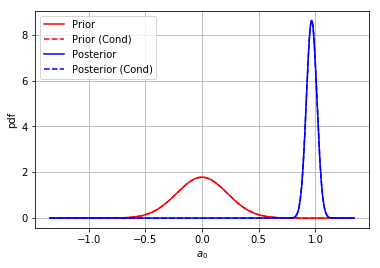

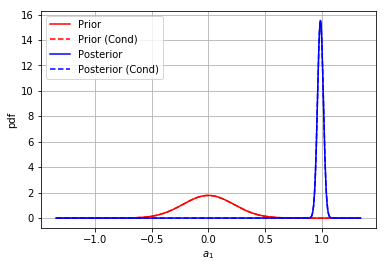

In [7]:
for i in range(0,N):
    pscale = 6
    var0i = b0*V0[i,i]/a0
    vari  = b*V[i,i]/a
    RhoMode0 = (a0-1)/b0
    RhoMode = (a-1)/b
    Wpriormin = m0[i]-pscale*np.sqrt(var0i)
    Wpriormax = m0[i]+pscale*np.sqrt(var0i)
    Wpostmin = m[i]-pscale*np.sqrt(vari)
    Wpostmax = m[i]+pscale*np.sqrt(vari)
    Wgrid = np.linspace(min(Wpriormin,Wpostmin),max(Wpostmax,Wpriormax),1000)
    WCprior = st.multivariate_normal.pdf(Wgrid,m0[i],V0[i,i]/RhoMode0)
    WCpost = st.multivariate_normal.pdf(Wgrid,m[i],V[i,i]/RhoMode)
    Wprior = st.t.pdf(Wgrid,2*a0,m0[i],np.sqrt(var0i))
    Wpost  = st.t.pdf(Wgrid,2*a,m[i],np.sqrt(vari))
    
    fig = plt.figure(i+1)
    plt.plot(Wgrid,Wprior,'r-',label='Prior')
    plt.plot(Wgrid,WCprior,'r--',label='Prior (Cond)')
    plt.plot(Wgrid,Wpost,'b-',label='Posterior')
    plt.plot(Wgrid,WCpost,'b--',label='Posterior (Cond)')
    plt.grid(True)
    plt.xlabel(r'$a_'+str(i)+'$')
    plt.ylabel('pdf')
    plt.legend(loc='best', numpoints = 1)
    plt.savefig('BLR_PDF_W'+str(i)+'.pdf',bbox_inches='tight')

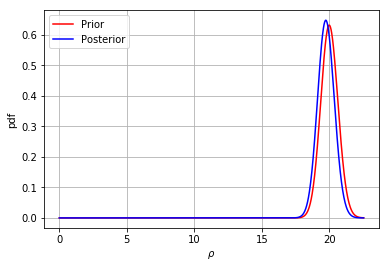

In [8]:
Rhopostmax = a/b+4*np.sqrt(a/b**2)
Rhopriormax = a0/b0+4*np.sqrt(a0/b0**2)
RhoGrid = np.linspace(0,max(Rhopostmax,Rhopriormax),1000)
RhoPrior = st.gamma.pdf(RhoGrid,a0,0,1/b0)
RhoPost = st.gamma.pdf(RhoGrid,a,0,1/b)
fig = plt.figure(N+1)
plt.plot(RhoGrid,RhoPrior,'r-',label='Prior')
plt.plot(RhoGrid,RhoPost,'b-',label='Posterior')
plt.grid(True)
plt.xlabel(r'$\rho$')
plt.ylabel('pdf')
plt.legend(loc='best', numpoints = 1)
plt.savefig('BLR_PDF_RHO.pdf',bbox_inches='tight')

Posterior predictive distribution:

In [9]:
Mnew = 100
Xextra = 2
Xnew = np.linspace(min(Xobs)-Xextra,max(Xobs)+Xextra,Mnew)
PhiNew = PhiMat(Xnew)
PredMean = np.matmul(PhiNew,m)
PredVar = (b/(a-1))*(np.matmul(PhiNew,np.matmul(V,np.transpose(PhiNew))) + np.identity(Mnew))

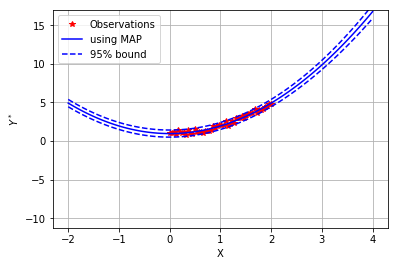

In [10]:
fig = plt.figure(N+1)
plt.plot(Xobs,Yobs,'r*',label='Observations')
plt.plot(Xnew,PredMean,'b-',label='using MAP')
plt.plot(Xnew,PredMean+2*np.sqrt(np.diag(PredVar)),'b--',label='95% bound')
plt.plot(Xnew,PredMean-2*np.sqrt(np.diag(PredVar)),'b--')
plt.grid(True)
plt.ylim([min(Yobs)-3*abs(max(Yobs)-min(Yobs)),max(Yobs)+3*abs(max(Yobs)-min(Yobs))])
plt.ylabel(r'$Y^*$')
plt.xlabel('X')
plt.legend(loc='best', numpoints = 1)
plt.savefig('BLR_predictions.pdf',bbox_inches='tight')
